## Final Project Submission

Please fill out:
* Student name: Lyndsay Maggin
* Student pace: self paced / part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Understand the Data

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Column Definitions

##### This dataset was created in 2016, therefore assume data is being used for 2016 housing sales

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront (0,1,nan)
* **view** - Has been viewed (0-4, nan)
* **condition** - How good the condition is ( Overall ) (1-5)
* **grade** - overall grade given to the housing unit, based on King County grading system (3-13)
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [12]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [19]:
list(set(df['yr_renovated'].dropna()))[-5:]

[2011.0, 2012.0, 2013.0, 2014.0, 2015.0]

In [50]:
columns =list(df.columns)

In [40]:
for col in columns:
    print(col,':', df[col].nunique())

id : 21420
date : 372
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 11
sqft_above : 942
sqft_basement : 304
yr_built : 116
yr_renovated : 70
zipcode : 70
lat : 5033
long : 751
sqft_living15 : 777
sqft_lot15 : 8682


In [98]:
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

In [99]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

# Synopsis

### The King County dataset is a list of homes sold between May 2014 and May 2015 in King County, Washington State (inclusive of Seattle). It is 2016 and I am a realtor in the King County Washington area working with a new family to find their forever home. Using this dataset, with my newly learned data science tools, I can predict the price that a home of interest will sell at and therefore can assist the family in entering a proper bid. 

#### Data Cleaning

In [32]:
#Out of 21597 homes, 63 do not have view information, 2376 do not have waterfront information and 3842 do not have renovation information.
#This makes up 0%, 11% and 18% of total homes respectively. For data munging purposes I will therefore assume these properties
#are not waterfront and have not been renovated. 

df = df.fillna(0)

In [52]:
categorical = ['floors', 'view', 'condition', 'grade', 'waterfront']

In [54]:
continuous = columns
for cat in categorical:
    countinuous = continuous.remove(cat)

In [56]:
continuous.remove('id')

In [58]:
continuous.remove('price')

In [59]:
continuous.remove('date')

In [60]:
continuous

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

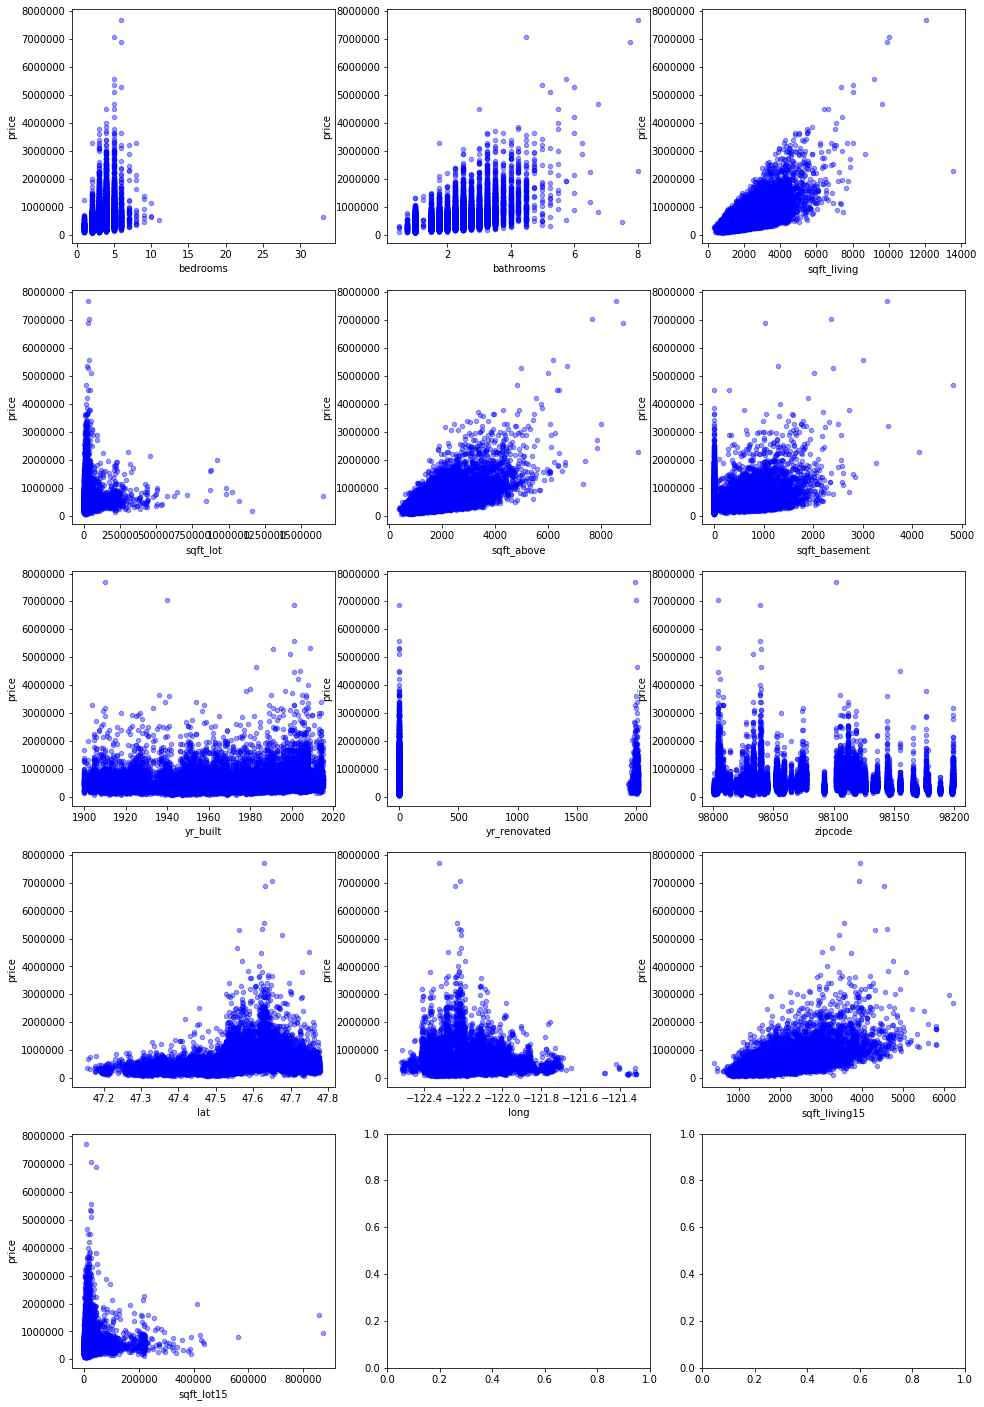

In [107]:
fig,axes = plt.subplots(5,3, figsize=(16,25))


for xcol, ax in zip(continuous, [x for v in axes for x in v]):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [109]:
#the sqft variable seem to have a linear relationship with price
#it is hard to tell about rennovation date with all of non reno figures, I will therefore remove these

In [111]:
df_reno = df[['price', 'yr_renovated']]
df_reno = df_reno[df_reno.yr_renovated != 0]

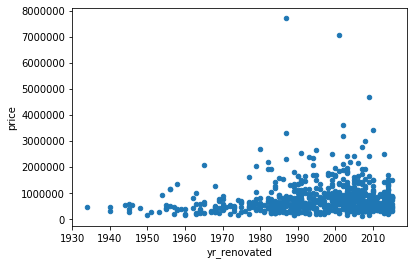

In [112]:
df_reno.plot(kind='scatter', x='yr_renovated', y='price')

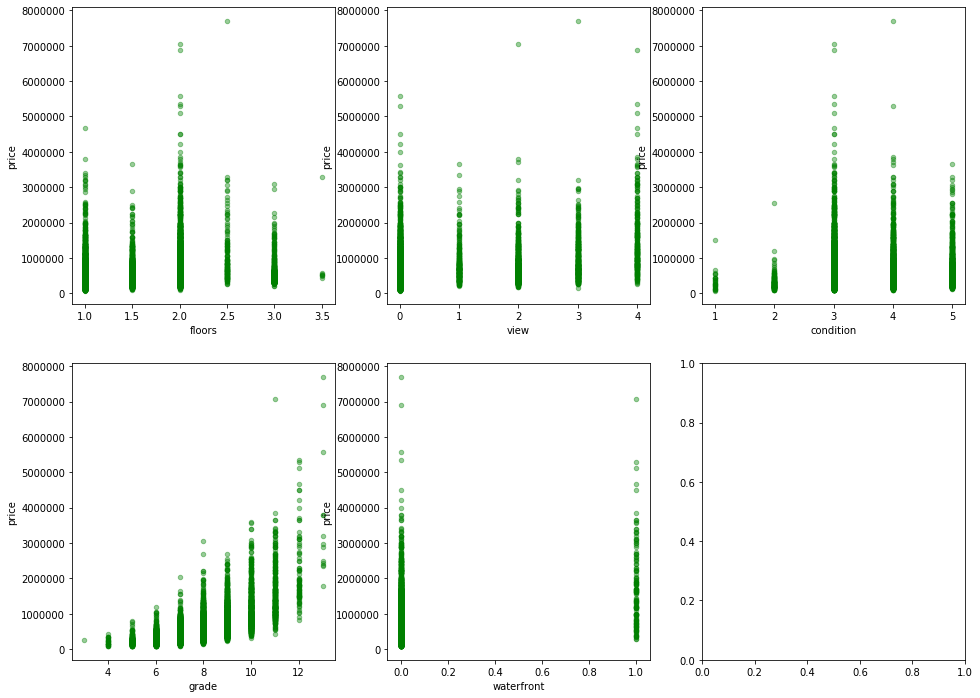

In [105]:
fig,axes = plt.subplots(2,3, figsize=(16,12))


for xcol, ax in zip(categorical, [x for v in axes for x in v]):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='g')

In [108]:
#looking at the above, view and waterfront do not seem to have any relationship with price.
#I therefore plan to remove these variables